In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import xarray as xr
import buoy_tools as bt

# NBDC Station 46042 Data

In [3]:
# NBDC 46042
#nbdc_july = bt.nbdc_to_ds('46042_Buoy/July_met_data.txt')
#nbdc_aug = bt.nbdc_to_ds('46042_Buoy/Aug_met_data.txt')
#nbdc_sept = bt.nbdc_to_ds('46042_Buoy/Sept_met_data.txt')
datapath = '46042_Buoy/2022_met_data.txt'
ds = bt.ndbc_to_ds(datapath)
ds

<xarray.Dataset>
Dimensions:  (time: 52529)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:50:00
Data variables: (12/13)
    WDIR     (time) float64 328.0 331.0 334.0 330.0 ... 296.0 302.0 307.0 304.0
    WSPD     (time) float64 12.9 12.6 11.6 12.2 12.0 ... 11.9 13.0 13.5 14.4
    GST      (time) float64 16.1 15.5 15.1 15.6 14.4 ... 15.5 17.9 18.4 19.7
    WVHT     (time) float64 nan nan nan nan 2.98 nan ... nan nan nan 3.86 nan
    DPD      (time) float64 nan nan nan nan 8.33 nan ... nan nan nan 12.9 nan
    APD      (time) float64 nan nan nan nan 6.28 nan ... nan nan nan 7.17 nan
    ...       ...
    PRES     (time) float64 1.013e+03 1.013e+03 ... 1.001e+03 1.001e+03
    ATMP     (time) float64 11.4 11.4 11.4 11.4 11.4 ... 12.2 12.3 12.3 12.1
    WTMP     (time) float64 12.7 12.7 12.7 12.7 12.7 ... nan nan nan nan 12.5
    DEWP     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    VIS      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    TIDE     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    Station:              46042
    Owner:                National Data Buoy Center
    URL:                  https://www.ndbc.noaa.gov/station_page.php?station=...
    Latitude:             36.785
    Longitude:            -122.396
    Air temp height:      3.7
    Anemometer height:    4.1
    Barometer elevation:  2.7
    Sea temp depth:       -1.5
    Water depth:          1693
    Sample frequency:     10 minutes

In [4]:
ds.to_netcdf('46042_Buoy/ndbc_2022.nc')

# M1 Mooring Data

In [2]:
def m1_1d_reshape(filepath):
    ds = xr.open_dataset(filepath)
    var_names = list(ds.data_vars)
    df = pd.DataFrame({'time':ds.time})
    for i in range(len(var_names)):
        df[var_names[i]] = ds[var_names[i]]
    #, var_names[1]:ds[var_names[1]], var_names[2]:ds[var_names[2]]})
    #df = df[df[var_names[2]] < 2]
    #depth = np.unique(df['z'])
    time = np.unique(df['time'])
    #pivoted_data = df.pivot(index='time',columns='z',values=var_names[1])
    #pivoted_data_flag = df.pivot(index='time',columns='z',values=var_names[2])
    
    ds2 = xr.Dataset(coords={'time': df['time'].values})
    ds2.time.attrs = ds.time.attrs
    for var in var_names:
        var_data = df[var]
        ds2[var] = (['time'],var_data)
        ds2[var].attrs = ds[var].attrs
    
    ds2.attrs = ds.attrs
    
    return ds2

In [3]:
m1_wind = m1_1d_reshape('M1/m1_wind_raw.nc')

In [4]:
m1_wind

<xarray.Dataset>
Dimensions:                              (time: 76612)
Coordinates:
  * time                                 (time) datetime64[ns] 2022-07-21T07:...
Data variables:
    wind_speed_sonic                     (time) float64 nan nan ... 3.238 2.485
    wind_from_direction_sonic            (time) float64 nan nan ... 211.8 239.8
    wind_speed_windbird                  (time) float64 nan nan ... 0.1085
    wind_from_direction_windbird         (time) float64 nan nan ... 244.2 272.2
    wind_speed_sonic_qc_agg              (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    wind_from_direction_sonic_qc_agg     (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    wind_speed_windbird_qc_agg           (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    wind_from_direction_windbird_qc_agg  (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    z                                    (time) float64 -250.0 -225.0 ... 2.5
Attributes:
    cdm_altitude_proxy:            z
    cdm_data_type:                 TimeSeriesProfile
    cdm_profile_variables:         time
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             webmaster.ndbc@noaa.gov,cencoos_communicat...
    contributor_name:              NOAA National Data Buoy Center (NDBC),Cent...
    contributor_role:              contributor,funder,contributor,processor
    contributor_role_vocabulary:   NERC
    contributor_url:               https://www.ndbc.noaa.gov/,http://cencoos....
    Conventions:                   IOOS-1.2, CF-1.6, ACDD-1.3
    creator_country:               USA
    creator_email:                 webmaster@mbari.org
    creator_institution:           Monterey Bay Aquarium Research Institute (...
    creator_name:                  Monterey Bay Aquarium Research Institute (...
    creator_sector:                nonprofit
    creator_type:                  institution
    creator_url:                   http://www.mbari.org/
    defaultDataQuery:              northward_sea_water_velocity,wind_speed_so...
    featureType:                   TimeSeriesProfile
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    geospatial_vertical_positive:  up
    geospatial_vertical_units:     m
    history:                       Downloaded from Monterey Bay Aquarium Rese...
    id:                            20716
    infoUrl:                       https://sensors.ioos.us/#metadata/20716/st...
    institution:                   Monterey Bay Aquarium Research Institute (...
    license:                       The data may be used and redistributed for...
    naming_authority:              com.axiomdatascience
    platform:                      buoy
    platform_name:                 M1 Mooring Real-Time Data, Monterey Bay, CA
    platform_vocabulary:           http://mmisw.org/ont/ioos/platform
    processing_level:              Level 2
    publisher_country:             USA
    publisher_email:               webmaster@mbari.org
    publisher_institution:         Monterey Bay Aquarium Research Institute (...
    publisher_name:                Monterey Bay Aquarium Research Institute (...
    publisher_sector:              nonprofit
    publisher_type:                institution
    publisher_url:                 http://www.mbari.org/
    references:                    http://www.mbari.org/oasis/index.html,http...
    sourceUrl:                     https://dods.mbari.org/opendap/data/ssdsda...
    standard_name_vocabulary:      CF Standard Name Table v72
    station_id:                    20716
    summary:                       Timeseries data from 'M1 Mooring Real-Time...
    time_coverage_end:             2022-09-09T06:51:00Z
    time_coverage_start:           2022-07-21T07:00:00Z
    title:                         M1 Mooring Real-Time Data, Monterey Bay, CA
    wmo_platform_code:             46092

In [45]:
# M1 mooring data

# Use by.m1_nc_reshape to create data arrays that are 2d instead of one
# 2d arrays are much easier to plot
m1_ns = bt.m1_2d_reshape('M1/m1_northward_raw.nc')
m1_ew = bt.m1_2d_reshape('M1/m1_eastward_raw.nc')
#m1_temp = bt.m1_2d_reshape('M1/m1_temp_raw.nc')
m1_temp = xr.open_dataset('M1/m1_temp_raw.nc')

# This data 1d, and doesn't require the z dimension
m1_wind = bt.m1_1d_reshape('M1/m1_wind_raw.nc')

In [47]:
m1_wind

<xarray.Dataset>
Dimensions:                              (time: 76612)
Coordinates:
  * time                                 (time) datetime64[ns] 2022-07-21T07:...
Data variables:
    wind_speed_sonic                     (time) float64 nan nan ... 3.238 2.485
    wind_from_direction_sonic            (time) float64 nan nan ... 211.8 239.8
    wind_speed_windbird                  (time) float64 nan nan ... 0.1085
    wind_from_direction_windbird         (time) float64 nan nan ... 244.2 272.2
    wind_speed_sonic_qc_agg              (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    wind_from_direction_sonic_qc_agg     (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    wind_speed_windbird_qc_agg           (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    wind_from_direction_windbird_qc_agg  (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    z                                    (time) float64 -250.0 -225.0 ... 2.5
Attributes:
    cdm_altitude_proxy:            z
    cdm_data_type:                 TimeSeriesProfile
    cdm_profile_variables:         time
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             webmaster.ndbc@noaa.gov,cencoos_communicat...
    contributor_name:              NOAA National Data Buoy Center (NDBC),Cent...
    contributor_role:              contributor,funder,contributor,processor
    contributor_role_vocabulary:   NERC
    contributor_url:               https://www.ndbc.noaa.gov/,http://cencoos....
    Conventions:                   IOOS-1.2, CF-1.6, ACDD-1.3
    creator_country:               USA
    creator_email:                 webmaster@mbari.org
    creator_institution:           Monterey Bay Aquarium Research Institute (...
    creator_name:                  Monterey Bay Aquarium Research Institute (...
    creator_sector:                nonprofit
    creator_type:                  institution
    creator_url:                   http://www.mbari.org/
    defaultDataQuery:              northward_sea_water_velocity,wind_speed_so...
    featureType:                   TimeSeriesProfile
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    geospatial_vertical_positive:  up
    geospatial_vertical_units:     m
    history:                       Downloaded from Monterey Bay Aquarium Rese...
    id:                            20716
    infoUrl:                       https://sensors.ioos.us/#metadata/20716/st...
    institution:                   Monterey Bay Aquarium Research Institute (...
    license:                       The data may be used and redistributed for...
    naming_authority:              com.axiomdatascience
    platform:                      buoy
    platform_name:                 M1 Mooring Real-Time Data, Monterey Bay, CA
    platform_vocabulary:           http://mmisw.org/ont/ioos/platform
    processing_level:              Level 2
    publisher_country:             USA
    publisher_email:               webmaster@mbari.org
    publisher_institution:         Monterey Bay Aquarium Research Institute (...
    publisher_name:                Monterey Bay Aquarium Research Institute (...
    publisher_sector:              nonprofit
    publisher_type:                institution
    publisher_url:                 http://www.mbari.org/
    references:                    http://www.mbari.org/oasis/index.html,http...
    sourceUrl:                     https://dods.mbari.org/opendap/data/ssdsda...
    standard_name_vocabulary:      CF Standard Name Table v72
    station_id:                    20716
    summary:                       Timeseries data from 'M1 Mooring Real-Time...
    time_coverage_end:             2022-09-09T06:51:00Z
    time_coverage_start:           2022-07-21T07:00:00Z
    title:                         M1 Mooring Real-Time Data, Monterey Bay, CA
    wmo_platform_code:             46092

In [48]:
m1_ns.to_netcdf('M1/m1_ns.nc')
m1_ew.to_netcdf('M1/m1_ew.nc')
m1_temp.to_netcdf('M1/m1_temp.nc')
m1_wind.to_netcdf('M1/m1_wind.nc')

In [8]:
m1_nw.northward_sea_water_velocity.attrs['actual_range']

{'_ChunkSizes': 512,
 'actual_range': [<xarray.DataArray 'northward_sea_water_velocity' ()>
  array(-2.42679079),
  <xarray.DataArray 'northward_sea_water_velocity' ()>
  array(5.76483912)],
 'ancillary_variables': 'northward_sea_water_velocity_qc_agg northward_sea_water_velocity_qc_tests',
 'id': '1028899',
 'ioos_category': 'Other',
 'long_name': 'Northward Sea Water Velocity',
 'platform': 'station',
 'short_name': 'northward_sea_water_velocity',
 'standard_name': 'northward_sea_water_velocity',
 'standard_name_url': 'http://mmisw.org/ont/cf/parameter/northward_sea_water_velocity',
 'units': 'm.s-1'}

<ipython-input-23-d70c5524e011>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(m1_nw.time, m1_nw.z, m1_nw.northward_sea_water_velocity.T,norm=norm)


Text(0, 0.5, 'Altitude (meters)')

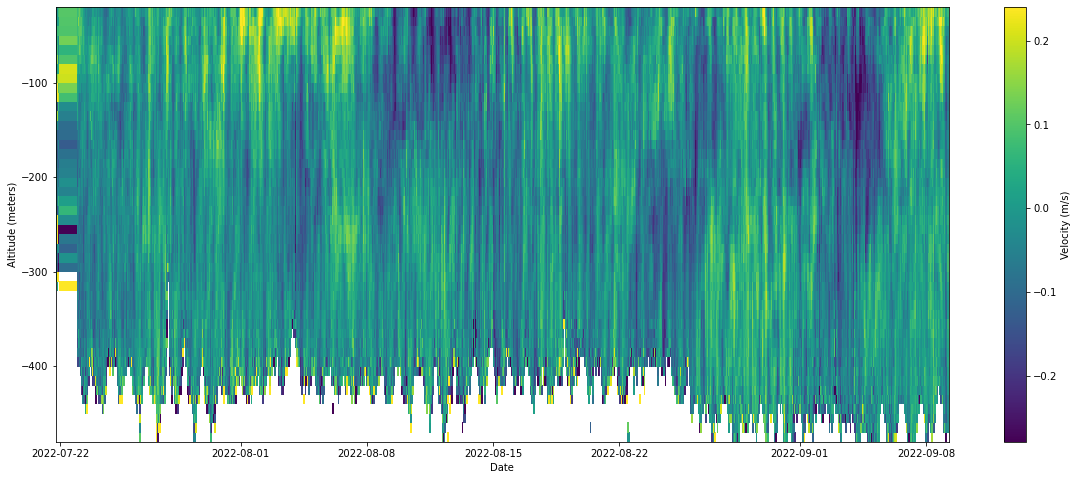

In [23]:
plt.figure(figsize = (20,8))
# 1 knot is 0.514444 m/s
minvel = min  # Limits for the colorbars used on the adcp colorplots
maxvel = max
norm = matplotlib.colors.Normalize(vmin=minvel,vmax=maxvel)
plt.pcolormesh(m1_nw.time, m1_nw.z, m1_nw.northward_sea_water_velocity.T,norm=norm)
plt.colorbar(label='Velocity (m/s)')
plt.xlabel('Date')
plt.ylabel('Altitude (meters)')

<ipython-input-30-b9bcd620d6f8>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(m1_temp.time, m1_temp.z, m1_temp.sea_water_temperature.T,norm=norm)


Text(0, 0.5, 'Altitude (meters)')

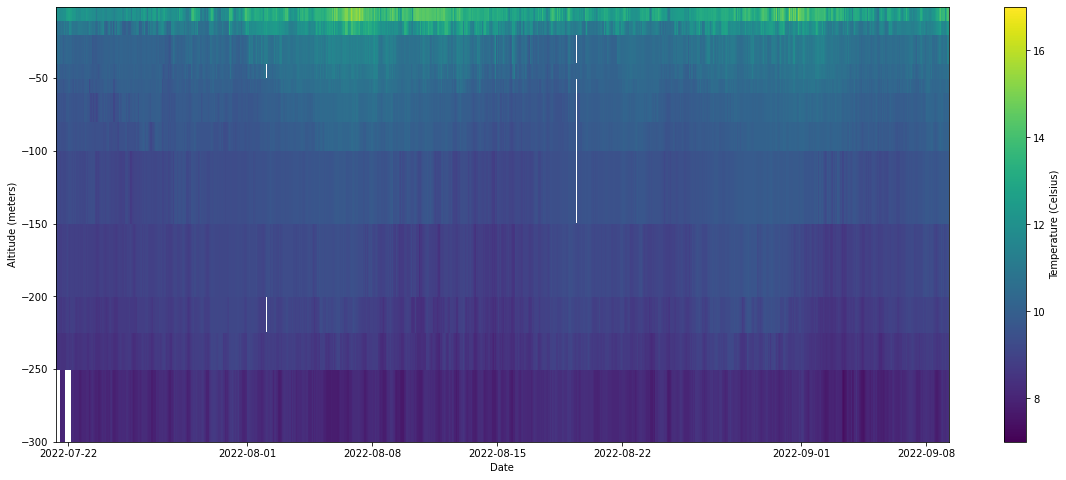

In [30]:
plt.figure(figsize = (20,8))
mintemp = 7#np.mean(m1_temp.sea_water_temperature) - (np.std(m1_temp.sea_water_temperature) * 3)  # Limits for the colorbars used on the adcp colorplots
maxtemp = 17#np.mean(m1_temp.sea_water_temperature) + (np.std(m1_temp.sea_water_temperature) * 3)
norm = matplotlib.colors.Normalize(vmin=mintemp,vmax=maxtemp)
plt.pcolormesh(m1_temp.time, m1_temp.z, m1_temp.sea_water_temperature.T,norm=norm)
plt.colorbar(label='Temperature (Celsius)')
plt.xlabel('Date')
plt.ylabel('Altitude (meters)')